# Basic Model Pipeline

## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from data_cleaner import DataCleaner
from predictor import Predictor
from utils import visualize_all  # Assuming this exists for visualization
import warnings
warnings.filterwarnings('ignore')

## Load and clean data

In [2]:
features_to_drop = [
    'Detail',
    'Detail on NON UIP',
    'Pathology Pattern Binary',
    'Pathology pattern',
    'Extras AP',
    'Treatment',
    'Extra',
    'Transplantation date',
    'Date of death',
    'Cause of death',
    'Identified Infection',
    'Pathology pattern UIP, probable or CHP',
    'Severity of telomere shortening - Transform 4',
    'FVC (L) 1 year after diagnosis', 
    'FVC (%) 1 year after diagnosis',
    'DLCO (%) 1 year after diagnosis', 
    'RadioWorsening2y',
]   

selected_features = [
       # 'Pedigree', 
       'Sex', 
       'FamilialvsSporadic',
       'Age at diagnosis', 
       'Comorbidities',
       'Radiological Pattern', 
       'Diagnosis after Biopsy',
       'Multidsciplinary committee', 
       'Pirfenidone', 
       'Nintedanib',
       'Antifibrotic Drug', 
       'Prednisone', 
       'Mycophenolate',
       'Extrapulmonary affectation',
       'Associated lung cancer', 
       'Other cancer', 
       'Type of neoplasia',
       'Blood count abnormality at diagnosis', 
       'Anemia', 
       'Thrombocytopenia',
       'Thrombocytosis', 
       'Lymphocytosis', 
       'Lymphopenia', 
       'Neutrophilia',
       'Neutropenia', 
       'Leukocytosis', 
       'Leukopenia',
       'LDH', 
       'ALT',
       'AST', 
       'ALP', 
       'GGT', 
       'Transaminitis', 
       'Cholestasis',
       'Liver disease', 
       #'FVC (L) at diagnosis',
       'FVC (%) at diagnosis', 
       'DLCO (%) at diagnosis',
       'Necessity of transplantation', 
       'Death', 
       # 'Type of family history',
       '1st degree relative', 
       '2nd degree relative', 
       'More than 1 relative',
       'Genetic mutation studied in patient', 
       'Mutation Type',
       'Severity of telomere shortening',
       'Progressive disease',
    #    'ProgressiveDisease', 
       'telomeric affectation', 
       'Hematologic Abnormalities', 
       'Liver Problem',
       'TERT',
       #'COD NUMBER',
       'Final diagnosis',
       'Event'
       ]

In [3]:
data_path = 'data/FibroPredCODIFICADA.xlsx'  # Adjust the path as needed
df = pd.read_excel(data_path, skiprows=1)

# Clean the data
cleaner = DataCleaner(df)
df_clean = cleaner.clean(selected_features=selected_features, features_to_drop=features_to_drop)

# Split the data into training and testing sets
df_train, df_test = train_test_split(
    df_clean, 
    test_size=0.2, 
    shuffle=True, 
)

Dropped features: ['Detail', 'Detail on NON UIP', 'Pathology Pattern Binary', 'Pathology pattern', 'Extras AP', 'Treatment', 'Extra', 'Transplantation date', 'Date of death', 'Cause of death', 'Identified Infection', 'Pathology pattern UIP, probable or CHP', 'Severity of telomere shortening - Transform 4', 'FVC (L) 1 year after diagnosis', 'FVC (%) 1 year after diagnosis', 'DLCO (%) 1 year after diagnosis', 'RadioWorsening2y']
Filled 10 missing 'Progressive disease' values with 0.


## Predict

### Predict Progressive Disease

In [4]:
# Prepare training and testing data for Progressive Disease
other_columns_to_drop = ['Death', 'Event', 'Necessity of transplantation']
df_train_PROG = df_train.drop(columns=other_columns_to_drop, errors='ignore')
df_test_PROG = df_test.drop(columns=other_columns_to_drop, errors='ignore')

# Initialize the Predictor for Progressive Disease
predictor_prog = Predictor(df_train_PROG, 'Progressive disease')
X_train_prog, y_train_prog = predictor_prog.prepare_data()

# Train the model
predictor_prog.train_model(X_train_prog, y_train_prog)

# Cross-validated predictions on training set
y_prob_train_prog = predictor_prog.cross_val_predict_proba(X_train_prog, y_train_prog)

# Evaluate the model
predictor_prog.evaluate_model(y_train_prog, y_prob_train_prog)

# Visualize results (if visualize_all function is available)
visualize_all(y_true=y_train_prog, y_prob=y_prob_train_prog)

# Predict on test set
X_test_prog = df_test_PROG.drop(columns=['Progressive disease'], errors='ignore')
y_test_prog = df_test_PROG['Progressive disease']
y_prob_test_prog = predictor_prog.predict(X_test_prog)

# Evaluate on test set
print("\nEvaluating Progressive Disease Prediction on Test Set:")
predictor_prog.evaluate_model(y_test_prog, y_prob_test_prog)

# Visualize test results (if visualize_all function is available)
visualize_all(y_true=y_test_prog, y_prob=y_prob_test_prog, set_type='Test')


Before dropping missing target 'Progressive disease': (177, 51)
After dropping missing target 'Progressive disease': (177, 51)

Training and tuning RandomForest...


KeyboardInterrupt: 

### Predict Event (Death/Transplantation)

Before dropping missing target 'Event': (177, 52)
After dropping missing target 'Event': (177, 52)

Training and tuning RandomForest...
Best parameters for RandomForest: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100, 'feature_selector__k': 5}
Best cross-validation F1 for RandomForest: 0.5786

Training and tuning AdaBoost...
Best parameters for AdaBoost: {'classifier__learning_rate': 1.0, 'classifier__n_estimators': 100, 'feature_selector__k': 10}
Best cross-validation F1 for AdaBoost: 0.6119

Training and tuning LogisticRegression...
Best parameters for LogisticRegression: {'classifier__C': 1.0, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs', 'feature_selector__k': 20}
Best cross-validation F1 for LogisticRegression: 0.4389

Best classifier after tuning: AdaBoost
Best F1 score: 0.6119

Top Feature Importances:
Age at diagnosis                       0.462119
ProgressiveDisease_Prob                0.239949
DLCO (%) at diagno

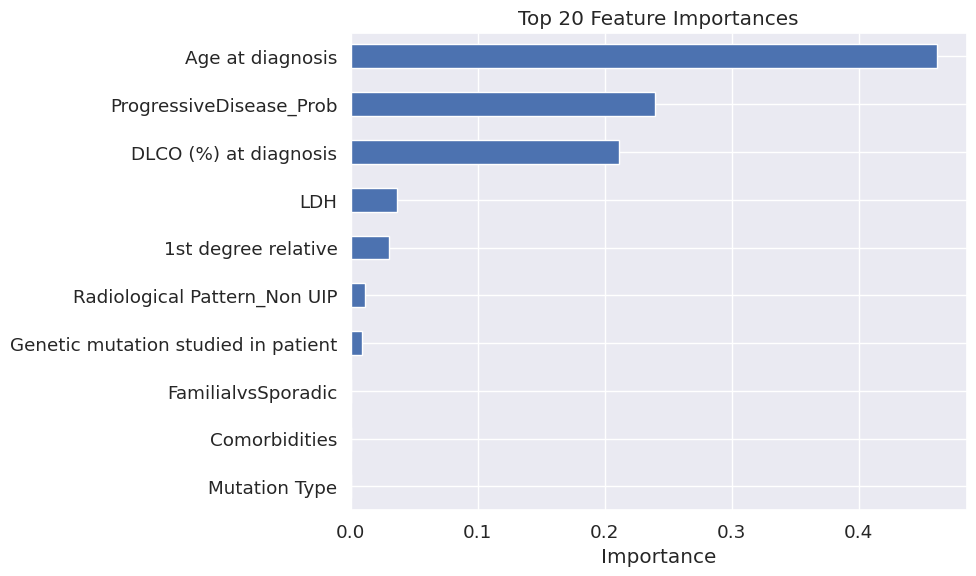

Cross-Validation: X shape: (177, 51)

Evaluation Results:
              precision    recall  f1-score   support

           0     0.8973    0.8851    0.8912       148
           1     0.4516    0.4828    0.4667        29

    accuracy                         0.8192       177
   macro avg     0.6744    0.6839    0.6789       177
weighted avg     0.8242    0.8192    0.8216       177

F1 Score: 0.4667
ROC AUC Score: 0.8911


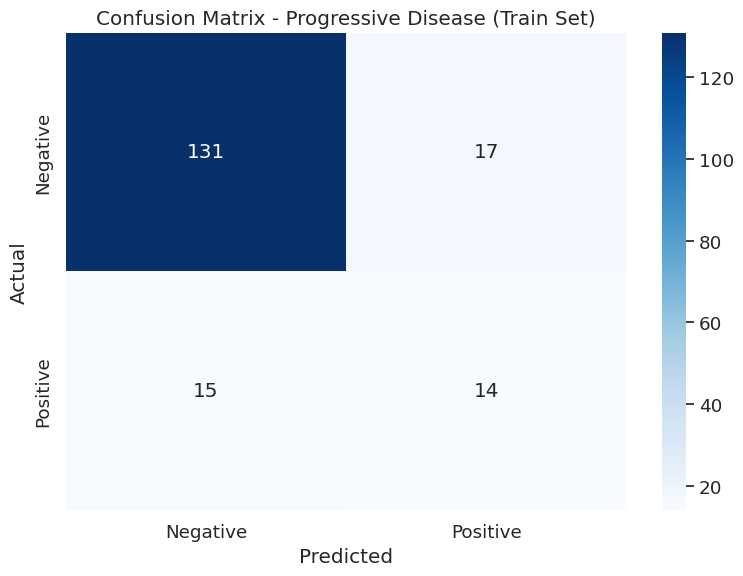

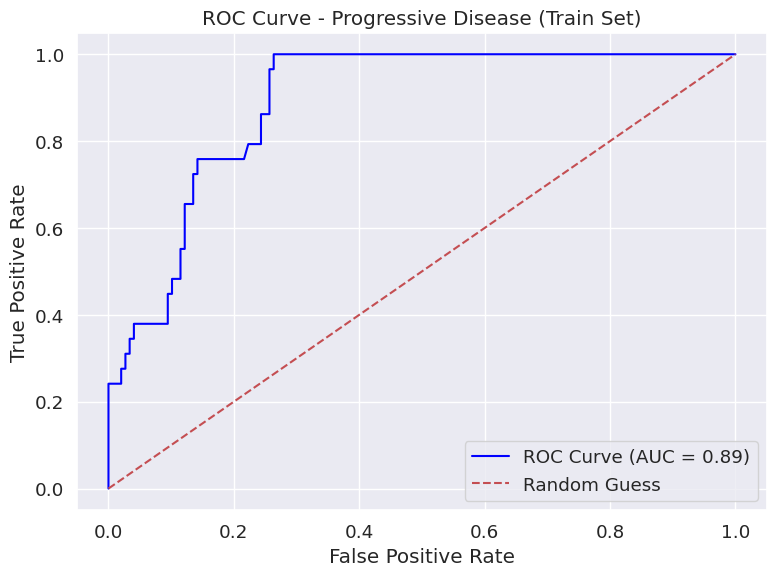


Evaluating Event Prediction on Test Set:

Evaluation Results:
              precision    recall  f1-score   support

           0     0.9756    0.9756    0.9756        41
           1     0.7500    0.7500    0.7500         4

    accuracy                         0.9556        45
   macro avg     0.8628    0.8628    0.8628        45
weighted avg     0.9556    0.9556    0.9556        45

F1 Score: 0.7500
ROC AUC Score: 0.9817


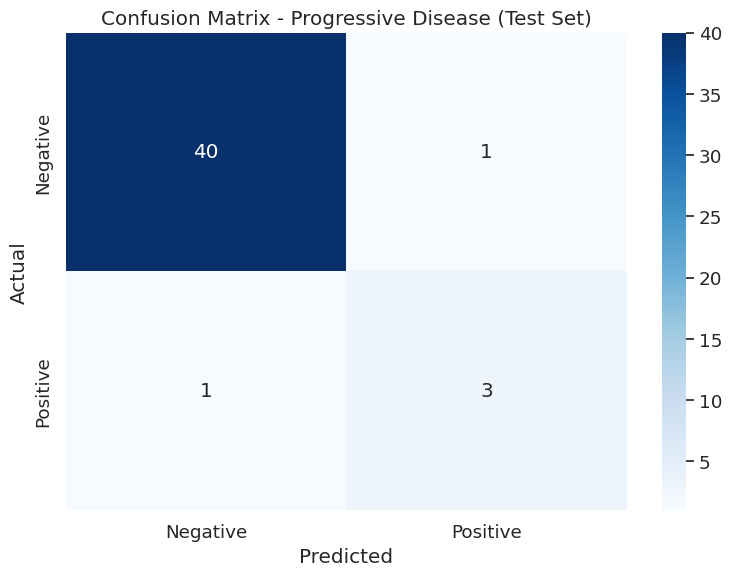

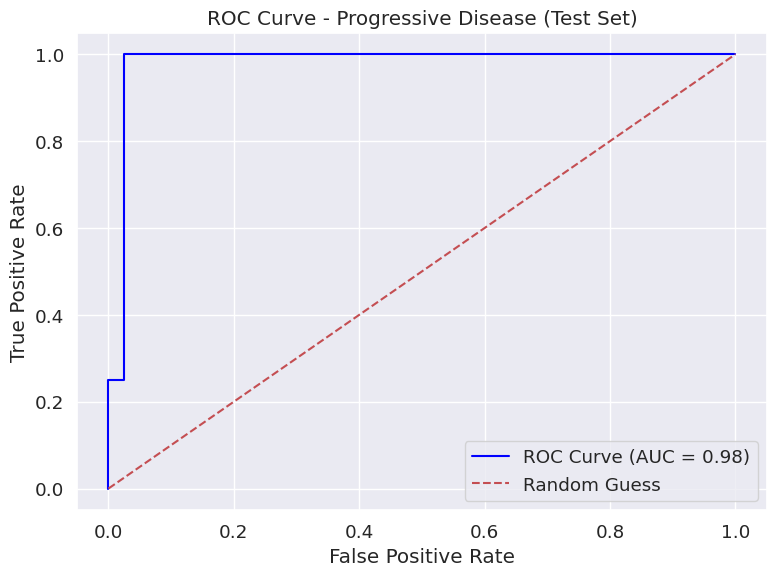

In [ ]:
# Prepare training and testing data for Event prediction
other_columns_to_drop = ['Necessity of transplantation', 'Death', 'Progressive disease']
df_train_EVENT = df_train.drop(columns=other_columns_to_drop, errors='ignore')
df_test_EVENT = df_test.drop(columns=other_columns_to_drop, errors='ignore')

# Add ProgressiveDisease_Prob as a feature
df_train_EVENT['ProgressiveDisease_Prob'] = y_prob_train_prog
df_test_EVENT['ProgressiveDisease_Prob'] = y_prob_test_prog

# Initialize the Predictor for Event
predictor_event = Predictor(df_train_EVENT, 'Event')
X_train_event, y_train_event = predictor_event.prepare_data()

# Train the model
predictor_event.train_model(X_train_event, y_train_event)

# Cross-validated predictions on training set
y_prob_train_event = predictor_event.cross_val_predict_proba(X_train_event, y_train_event)

# Evaluate the model
predictor_event.evaluate_model(y_train_event, y_prob_train_event)

# Visualize results (if visualize_all function is available)
visualize_all(y_true=y_train_event, y_prob=y_prob_train_event)

# Predict on test set
X_test_event = df_test_EVENT.drop(columns=['Event'], errors='ignore')
y_test_event = df_test_EVENT['Event']
y_prob_test_event = predictor_event.predict(X_test_event)

# Evaluate on test set
print("\nEvaluating Event Prediction on Test Set:")
predictor_event.evaluate_model(y_test_event, y_prob_test_event)

# Visualize test results (if visualize_all function is available)
visualize_all(y_true=y_test_event, y_prob=y_prob_test_event, set_type='Test')
